#  Covid-19 trend forecasting in LSTM model

In this jupyter notebook, we will assess the ability of LSTM model in Covid-19 forecasting. 

This forecasting work based on the WHO Coronavirus Disease (COVID-19) Dashboard (27/09/2020)
https://covid19.who.int/

There are 4 countries for our target, including Australia, China, Italy and US

Previously we have complete the data extraction from original sources, and now we are going to load these dataset and do further processing.

# 1. proprecessing

## 1.1 Data loading

In [1]:
import IPython
import IPython.display
from tensorflow import keras

In [2]:
import os,glob
import pandas as pd
import numpy as np
data_all = pd.read_csv(r"D:\Download\COVID19\WHO-COVID-19-global-data.csv", index_col=None)

In [3]:
data_all.columns = data_all.columns.str.replace(' ', '')

In [4]:
data_all.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63215 entries, 0 to 63214
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      63215 non-null  object
 1   Country_code       62946 non-null  object
 2   Country            63215 non-null  object
 3   WHO_region         63215 non-null  object
 4   New_cases          63215 non-null  int64 
 5   Cumulative_cases   63215 non-null  int64 
 6   New_deaths         63215 non-null  int64 
 7   Cumulative_deaths  63215 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.9+ MB


In [6]:
data_all.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,63215.000000,6.321500e+04,63215.000000,63215.000000
mean,517.771810,3.651005e+04,15.680202,1474.109990
std,3788.950602,2.725697e+05,108.257858,9350.207733
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,1.450000e+02,0.000000,2.000000
75%,57.000000,3.906000e+03,1.000000,78.000000
max,97894.000000,6.960152e+06,6409.000000,202478.000000


In [7]:
site_cn = data_all[['Date_reported',"New_cases"]][data_all.Country == "China"]
site_cn_group =  site_cn.groupby(['Date_reported'],as_index=False).sum()
site_cn_group.rename(columns={"New_cases":"NC_cn_24h"}, inplace=True)
site_cn_group

,Date_reported,NC_cn_24h
0,2020-01-03,0
1,2020-01-04,1
2,2020-01-05,0
3,2020-01-06,3
4,2020-01-07,0
...,...,...
264,2020-09-23,18
265,2020-09-24,10
266,2020-09-25,15
267,2020-09-26,18


In [8]:
site_au = data_all[['Date_reported',"New_cases"]][data_all.Country == "Australia"]
site_au_group =  site_au.groupby(['Date_reported'],as_index=False).sum()
site_au_group.rename(columns={"New_cases":"NC_au_24h"}, inplace=True)
site_au_group

,Date_reported,NC_au_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,30
265,2020-09-24,31
266,2020-09-25,10
267,2020-09-26,17


In [9]:
site_it = data_all[['Date_reported',"New_cases"]][data_all.Country == "Italy"]
site_it_group =  site_it.groupby(['Date_reported'],as_index=False).sum()
site_it_group.rename(columns={"New_cases":"NC_it_24h"}, inplace=True)
site_it_group

,Date_reported,NC_it_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,1391
265,2020-09-24,1640
266,2020-09-25,1786
267,2020-09-26,1912


In [10]:
site_us = data_all[['Date_reported',"New_cases"]][data_all.Country == "United States of America"]
site_us_group =  site_us.groupby(['Date_reported'],as_index=False).sum()
site_us_group.rename(columns={"New_cases":"NC_us_24h"}, inplace=True)
site_us_group

,Date_reported,NC_us_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,39145
265,2020-09-24,49176
266,2020-09-25,40043
267,2020-09-26,41254


In [12]:
all_data_df = site_cn_group.merge(site_au_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_it_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_us_group, left_on='Date_reported', right_on='Date_reported')

In [13]:
all_data_df

,Date_reported,NC_cn_24h,NC_au_24h,NC_it_24h,NC_us_24h
0,2020-01-03,0,0,0,0
1,2020-01-04,1,0,0,0
2,2020-01-05,0,0,0,0
3,2020-01-06,3,0,0,0
4,2020-01-07,0,0,0,0
...,...,...,...,...,...
264,2020-09-23,18,30,1391,39145
265,2020-09-24,10,31,1640,49176
266,2020-09-25,15,10,1786,40043
267,2020-09-26,18,17,1912,41254


In [14]:
all_data_df.to_csv(r'D:\Download\COVID19\data\WHO-COVID-19-global-data.csv', index = False, header=True)

Before the process, we need to make sure the data has frequency attributes.

## 1.2 frequence check

In [15]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

~~~~~~~~~~~~
Next we want to extract date time

~~~~~~~~~~~~

In [16]:
df_time = all_data_df.copy()
date_time = pd.to_datetime(df_time.pop('Date_reported'), format='%Y-%m-%d %H:%M:%S')

In [17]:
date_time

0     2020-01-03
1     2020-01-04
2     2020-01-05
3     2020-01-06
4     2020-01-07
         ...    
264   2020-09-23
265   2020-09-24
266   2020-09-25
267   2020-09-26
268   2020-09-27
Name: Date_reported, Length: 269, dtype: datetime64[ns]

In [18]:
df_time.head()

,NC_cn_24h,NC_au_24h,NC_it_24h,NC_us_24h
0,0,0,0,0
1,1,0,0,0
2,0,0,0,0
3,3,0,0,0
4,0,0,0,0


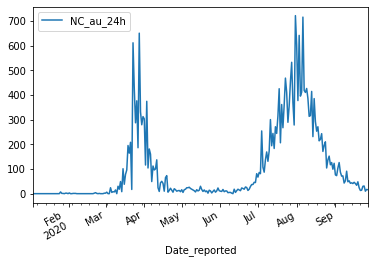

In [19]:
plot_cols = ['NC_au_24h']
plot_features = df_time[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

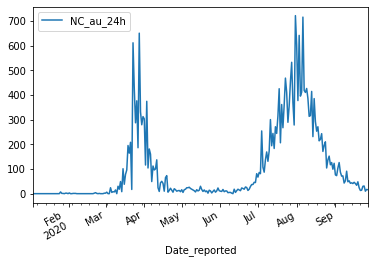

In [20]:
plot_features = df_time[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True)

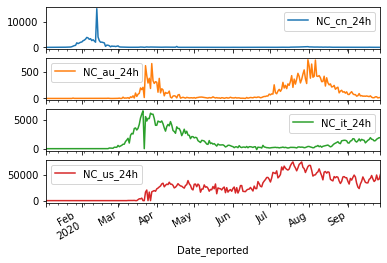

In [21]:
plot_cols = ['NC_cn_24h','NC_au_24h','NC_it_24h','NC_us_24h']
plot_features = df_time[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

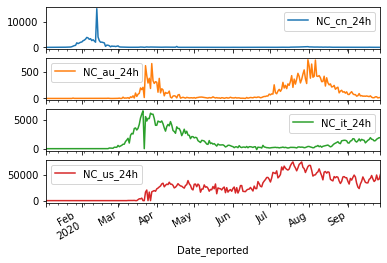

In [22]:
plot_features = df_time[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True)

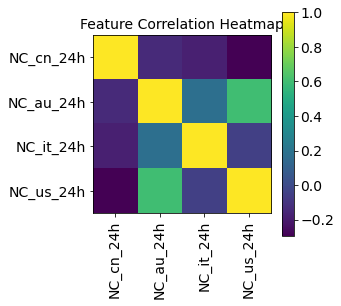

In [23]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df_time[plot_cols])

# 2. Problem formulation and modelling

## Forecasting the trend of death and infection cases of COVID-19

### Data preparation

# Australia

In [24]:
selected_features = ['NC_au_24h']
date_time_key = "Date_reported"
features = all_data_df[selected_features]
features.index = all_data_df["Date_reported"]
features.head()

,NC_au_24h
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0


### Normalization and data set split

We will have 70% days as training,20% days as validation.

Note the data is **not** being randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.



In [25]:
train_fraction = 0.7
test_fraction = 0.9

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

In [26]:
def normalize(data, train_split):
    n = len(data)
    data_mean = data[:int(n*train_split)].mean(axis=0)
    data_std = data[:int(n*train_split)].std(axis=0)
    print(data_mean)
    print(data_std)
    return (data - data_mean) / data_std


In [27]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

[46.56914894]
[98.2797814]


,0
0,-0.473843
1,-0.473843
2,-0.473843
3,-0.473843
4,-0.473843


In [28]:
n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

val case until: 188 test case until:  242


# test_data, LearningRate 0.05, Epochs 1000

In [29]:
step = 1
past = 25
future = 5
learning_rate = 0.05
batch_size = 30
epochs = 1000

In [30]:
start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

start: 30  end: 218


In [31]:
x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


In [32]:
sequence_length = int(past / step)
print(sequence_length)

25


In [33]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


In [34]:
val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)

start: 188  end: 242


In [35]:

temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

array([[0.85908668],
       [1.28643806],
       [2.57866722],
       [1.50011375],
       [2.00886539],
       [1.38818839],
       [2.28359127],
       [2.00886539],
       [2.73129272],
       [3.85054632],
       [1.62221414],
       [3.19934423],
       [2.24289114],
       [3.17899416],
       [4.28807274],
       [3.69792083],
       [2.46674186],
       [3.13829403],
       [4.13544724],
       [4.93927484],
       [3.28074449],
       [2.3548165 ],
       [6.86235604],
       [5.65152713],
       [3.36214475],
       [6.04835341],
       [3.54529534],
       [3.70809587],
       [6.80130584],
       [3.7793211 ],
       [3.69792083],
       [3.86072136],
       [3.45372005],
       [2.71094265],
       [2.74146775],
       [3.73862096],
       [1.87658996],
       [3.44354501],
       [2.49726696],
       [2.10044068],
       [2.28359127],
       [1.7036144 ],
       [1.7646646 ],
       [1.99869035],
       [1.26608799],
       [1.51028878],
       [1.66291427],
       [0.584

In [36]:
y_val

,0
218,3.697921
219,3.860721
220,3.453720
221,2.710943
222,2.741468
223,3.738621
224,1.876590
225,3.443545
226,2.497267
227,2.100441


In [37]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [38]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (30, 25, 1)
Target shape: (30, 1)


### model and training

In this section we will setup our model using LSTM unit.

In [39]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [40]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 1.2856
Epoch 00001: val_loss improved from inf to 2.99592, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 70ms/step - loss: 1.2856 - val_loss: 2.9959
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1952
Epoch 00002: val_loss improved from 2.99592 to 0.48611, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.9811 - val_loss: 0.4861
Epoch 3/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0675
Epoch 00003: val_loss did not improve from 0.48611
6/6 [==============================] - 0s 16ms/step - loss: 0.8093 - val_loss: 1.5674
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0301
Epoch 00004: val_loss improved from 0.48611 to 0.39720, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.6719 - val_loss: 0.3972
Epoch 5/1000
1/6 [====>..........

### Evaluation

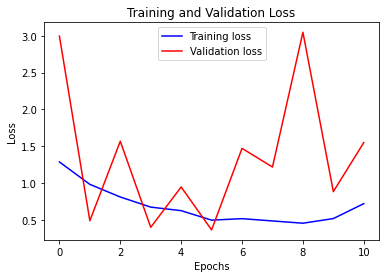

In [41]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
visualize_loss(history, "Training and Validation Loss")

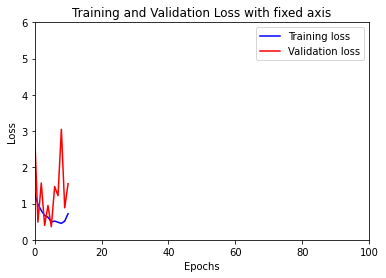

In [42]:
def visualize_loss_fixed_axis(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.axis([0, 100, 0, 6])
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show() 
    
visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

### Prediction

In [43]:
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

In [44]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

In [45]:
def re_normalize(data, train_split,y):
    n = len(data)
    data_mean = data[:int(n*train_split)].mean(axis=0)
    data_std = data[:int(n*train_split)].std(axis=0)
    print(data_mean[0])
    print(data_std[0])
    return y * data_std[0] + data_mean[0]


In [46]:
features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 
print(y_hat.size)
y_data = pd.DataFrame(y_hat)
print(y_data)

46.569148936170215
98.27978139572038
27
             0
0    82.304550
1    79.681351
2   105.775833
3   121.901184
4    91.805801
5    77.929314
6    78.805542
7    53.904434
8    61.427448
9    95.187553
10   58.049107
11   61.427448
12   53.087238
13   54.725708
14   52.274239
15   56.380001
16   52.274239
17   46.709915
18   58.049107
19   39.193317
20   31.588261
21   32.249271
22   43.638546
23   44.398560
24   29.642544
25   34.269272
26   33.589809


In [47]:
dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i    
print(dict_index)
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'}) 
print(y_data.size)
result = pd.concat([features, y_data], axis=1, join='outer')
print(result)
print(features)

{0: 268, 1: 269, 2: 270, 3: 271, 4: 272, 5: 273, 6: 274, 7: 275, 8: 276, 9: 277, 10: 278, 11: 279, 12: 280, 13: 281, 14: 282, 15: 283, 16: 284, 17: 285, 18: 286, 19: 287, 20: 288, 21: 289, 22: 290, 23: 291, 24: 292, 25: 293, 26: 294}
27
     NC_au_24h  prediction
0          0.0         NaN
1          0.0         NaN
2          0.0         NaN
3          0.0         NaN
4          0.0         NaN
..         ...         ...
290        NaN   43.638546
291        NaN   44.398560
292        NaN   29.642544
293        NaN   34.269272
294        NaN   33.589809

[295 rows x 2 columns]
     NC_au_24h
0            0
1            0
2            0
3            0
4            0
..         ...
264         30
265         31
266         10
267         17
268         16

[269 rows x 1 columns]


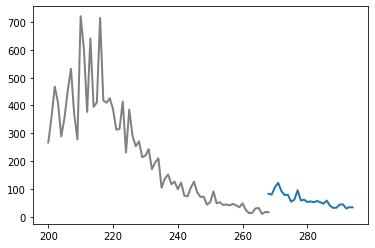

In [48]:
plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.01, Epochs 1000

In [49]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
#print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.01
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
#print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)

sequence_length = int(past / step)
#print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
#print ("start:",val_start, " end:", val_end)

temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

#print("Input shape:", inputs.numpy().shape)
#print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)




[46.56914894]
[98.2797814]
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 1.0705
Epoch 00001: val_loss improved from inf to 1.32149, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 1.0705 - val_loss: 1.3215
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0490
Epoch 00002: val_loss improved 

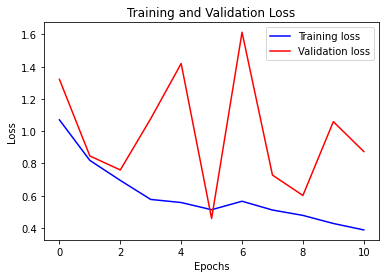

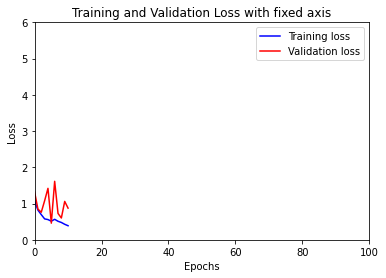

In [50]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


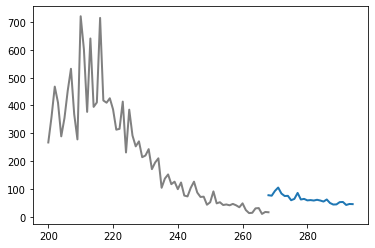

In [51]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.005, Epochs 1000

In [52]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.005
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)




[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 1.1708
Epoch 00001: val_loss improved from inf to 1.43309, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 62ms/step - loss:

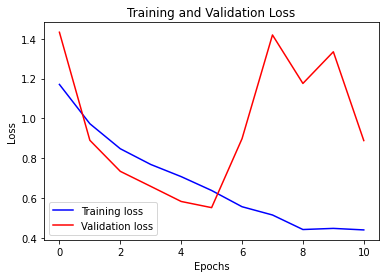

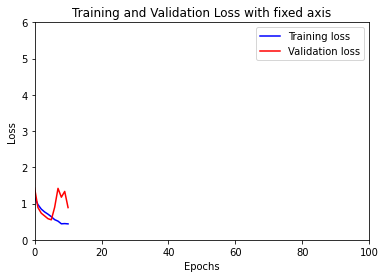

In [53]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


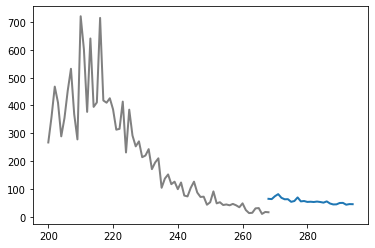

In [54]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.001, Epochs 1000

In [55]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.001
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)




[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 1.1332
Epoch 00001: val_loss improved from inf to 2.66684, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss:

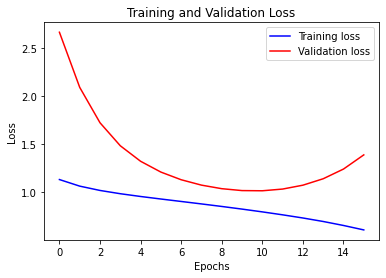

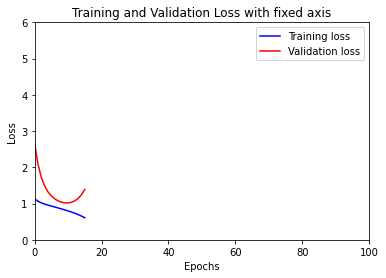

In [56]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


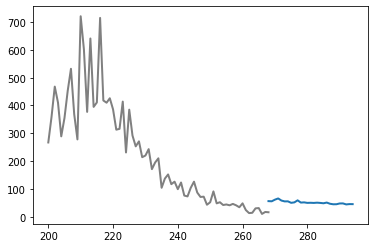

In [57]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0005, Epochs 1000

In [58]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0005
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 1.2727
Epoch 00001: val_loss improved from inf to 4.82482, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss:

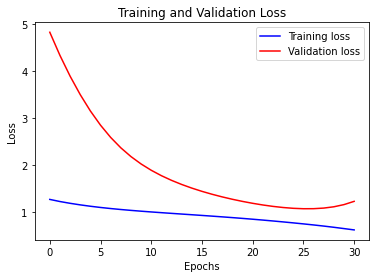

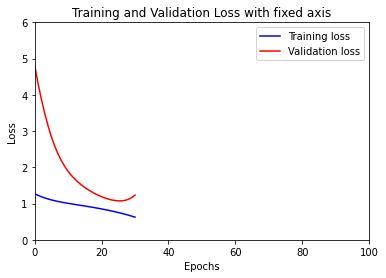

In [59]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


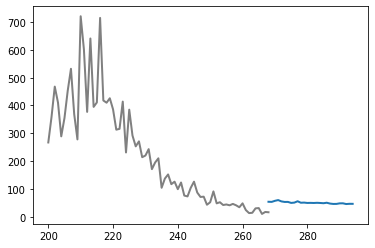

In [60]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0001, Epochs 1000

In [61]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0001
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 1.0501
Epoch 00001: val_loss improved from inf to 3.03185, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss

Epoch 30/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0801
Epoch 00030: val_loss improved from 1.63952 to 1.61301, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.9384 - val_loss: 1.6130
Epoch 31/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0798
Epoch 00031: val_loss improved from 1.61301 to 1.58755, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.9356 - val_loss: 1.5876
Epoch 32/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0796
Epoch 00032: val_loss improved from 1.58755 to 1.56309, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.9328 - val_loss: 1.5631
Epoch 33/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0795
Epoch 00033: val_loss improved from 1.56309 to 1.53958, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.9300 - v

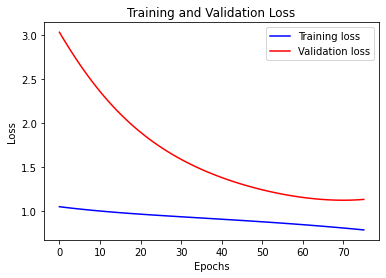

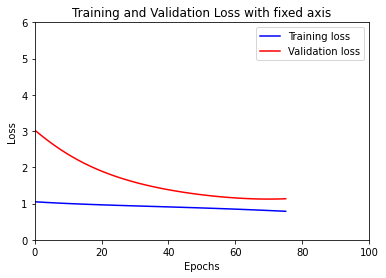

In [62]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


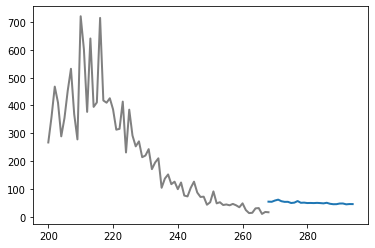

In [63]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.05, Epochs 2000

In [64]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.05
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 2.3393
Epoch 00001: val_loss improved from inf to 2.18929, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 65ms/step - loss

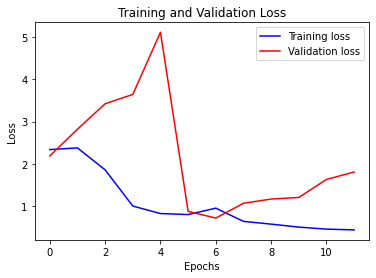

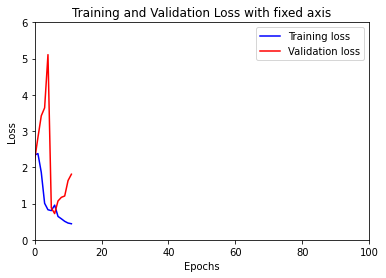

In [65]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


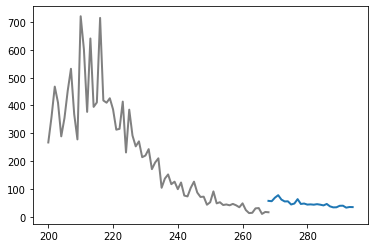

In [66]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.01, Epochs 2000

In [67]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.01
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 1.1249
Epoch 00001: val_loss improved from inf to 0.66522, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss

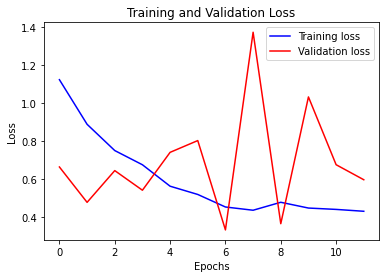

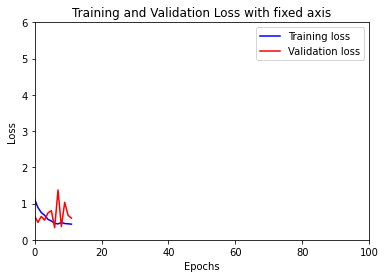

In [68]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


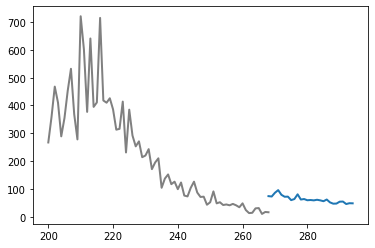

In [69]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.005, Epochs 2000

In [70]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.005
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 1.2799
Epoch 00001: val_loss improved from inf to 2.59202, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 62ms/step - loss

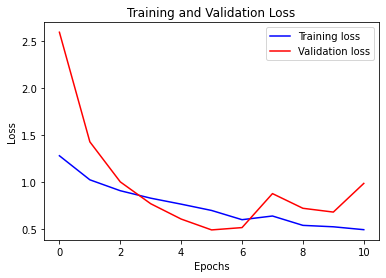

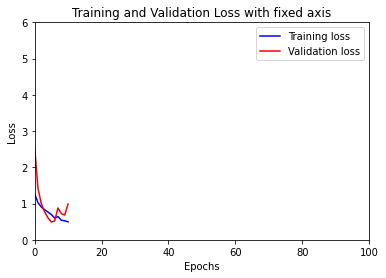

In [71]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


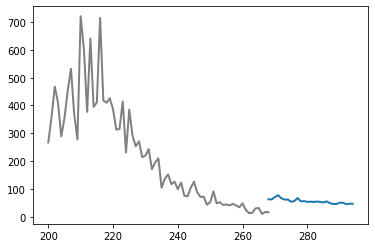

In [72]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.001, Epochs 2000

In [73]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.001
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 1.2025
Epoch 00001: val_loss improved from inf to 3.60307, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss

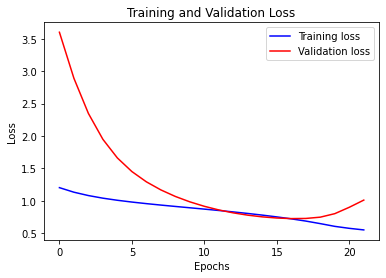

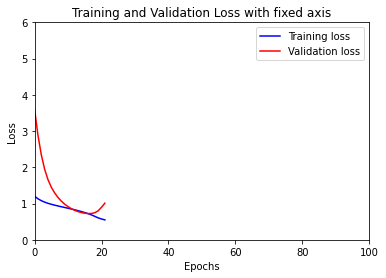

In [74]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


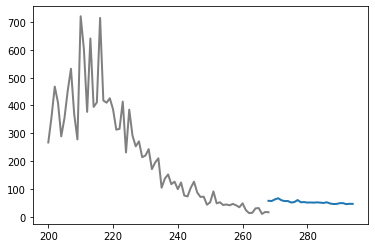

In [75]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0005, Epochs 2000

In [76]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0005
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 1.2097
Epoch 00001: val_loss improved from inf to 4.26327, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 64ms/step - loss

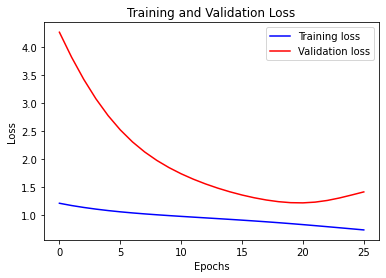

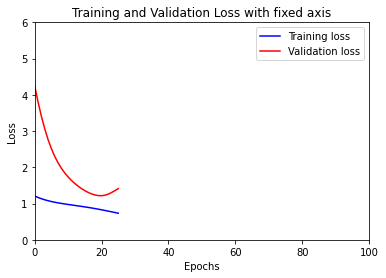

In [77]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


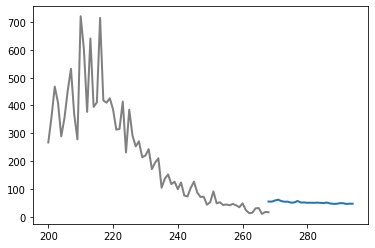

In [78]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0001, Epochs 2000

In [79]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0001
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 1.1542
Epoch 00001: val_loss improved from inf to 3.56661, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss

Epoch 30/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1160
Epoch 00030: val_loss improved from 1.87725 to 1.84346, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.0100 - val_loss: 1.8435
Epoch 31/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1153
Epoch 00031: val_loss improved from 1.84346 to 1.81079, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.0067 - val_loss: 1.8108
Epoch 32/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1147
Epoch 00032: val_loss improved from 1.81079 to 1.77919, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.0034 - val_loss: 1.7792
Epoch 33/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1142
Epoch 00033: val_loss improved from 1.77919 to 1.74860, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.0001 - v

Epoch 95/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1706
Epoch 00095: val_loss improved from 0.86743 to 0.86691, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.7903 - val_loss: 0.8669
Epoch 96/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1727
Epoch 00096: val_loss did not improve from 0.86691
6/6 [==============================] - 0s 16ms/step - loss: 0.7857 - val_loss: 0.8671
Epoch 97/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1747
Epoch 00097: val_loss did not improve from 0.86691
6/6 [==============================] - 0s 15ms/step - loss: 0.7811 - val_loss: 0.8681
Epoch 98/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1766
Epoch 00098: val_loss did not improve from 0.86691
6/6 [==============================] - 0s 15ms/step - loss: 0.7765 - val_loss: 0.8698
Epoch 99/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.1785
Epoch 00099: val_loss did not i

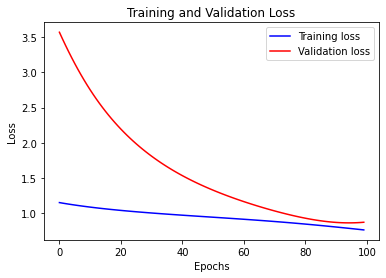

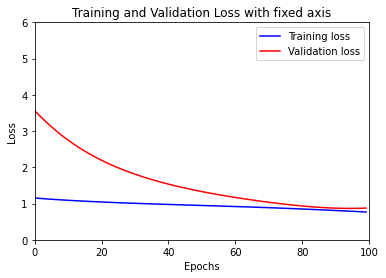

In [80]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


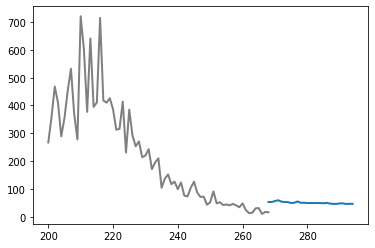

In [81]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.05, Epochs 3000

In [82]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.05
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 1.3865
Epoch 00001: val_loss improved from inf to 1.76623, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss

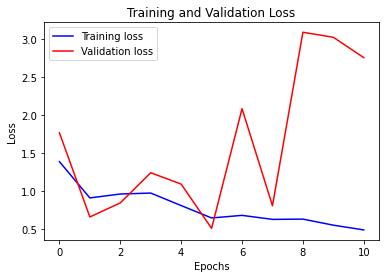

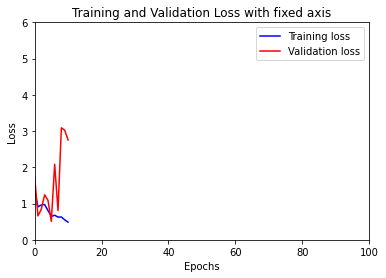

In [83]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


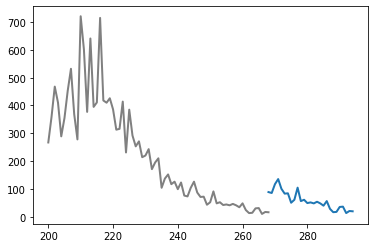

In [84]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.01, Epochs 3000

In [85]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.01
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 1.1564
Epoch 00001: val_loss improved from inf to 0.73678, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 64ms/step - loss

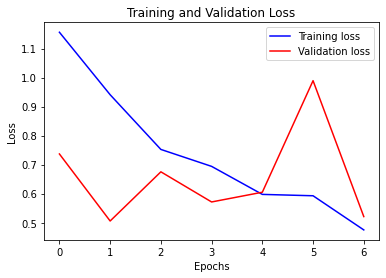

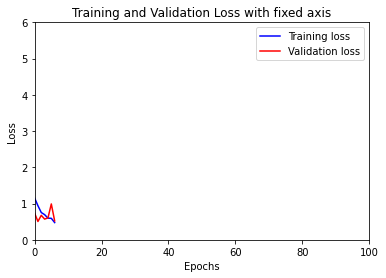

In [86]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


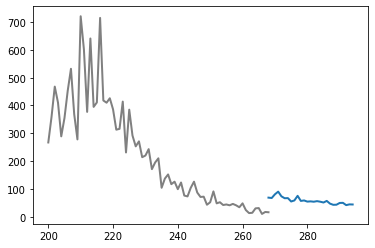

In [87]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.005, Epochs 3000

In [88]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.005
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 1.1494
Epoch 00001: val_loss improved from inf to 1.57181, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss

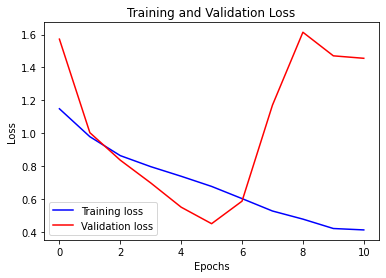

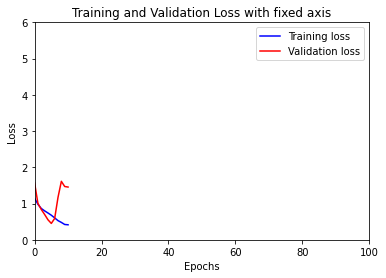

In [89]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


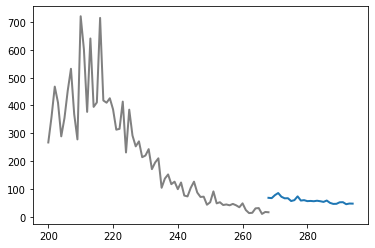

In [90]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.001, Epochs 3000

In [91]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.001
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 1.0776
Epoch 00001: val_loss improved from inf to 2.49067, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 62ms/step - loss

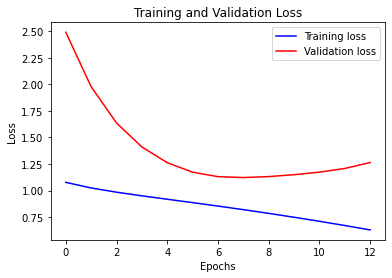

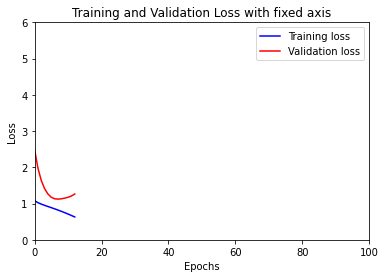

In [92]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


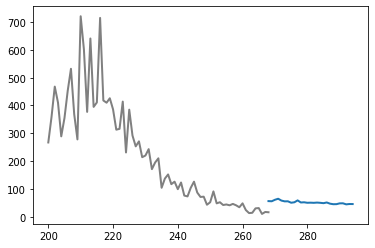

In [93]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0005, Epochs 3000

In [94]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0005
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 1.2354
Epoch 00001: val_loss improved from inf to 4.89441, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 64ms/step - loss

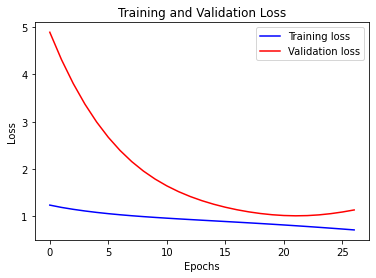

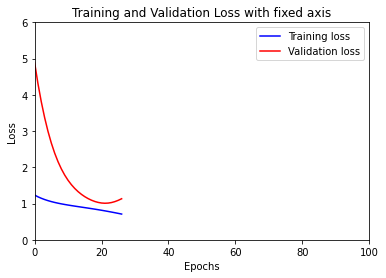

In [95]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


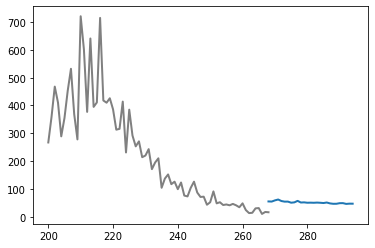

In [96]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0001, Epochs 3000

In [97]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0001
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[46.56914894]
[98.2797814]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 1.4200
Epoch 00001: val_loss improved from inf to 6.49695, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss

Epoch 30/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1701
Epoch 00030: val_loss improved from 3.67998 to 3.61377, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.1382 - val_loss: 3.6138
Epoch 31/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1666
Epoch 00031: val_loss improved from 3.61377 to 3.54939, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 1.1320 - val_loss: 3.5494
Epoch 32/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1633
Epoch 00032: val_loss improved from 3.54939 to 3.48680, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.1259 - val_loss: 3.4868
Epoch 33/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1601
Epoch 00033: val_loss improved from 3.48680 to 3.42594, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.1200 - v

Epoch 95/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1157
Epoch 00095: val_loss improved from 1.66190 to 1.65168, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.8564 - val_loss: 1.6517
Epoch 96/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1168
Epoch 00096: val_loss improved from 1.65168 to 1.64196, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.8518 - val_loss: 1.6420
Epoch 97/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1179
Epoch 00097: val_loss improved from 1.64196 to 1.63276, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.8471 - val_loss: 1.6328
Epoch 98/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1190
Epoch 00098: val_loss improved from 1.63276 to 1.62407, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.8424 - v

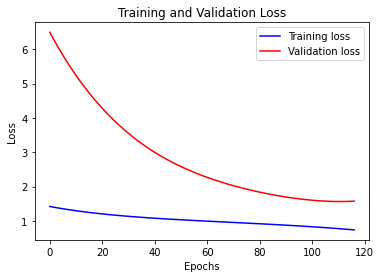

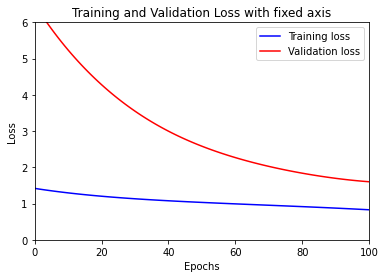

In [98]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

46.569148936170215
98.27978139572038


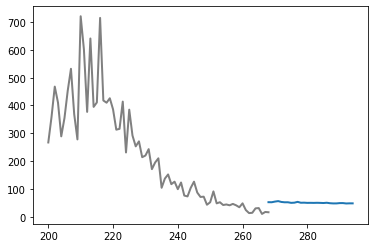

In [99]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_au_24h'], linewidth=2, markersize=12,color='grey')